In [1]:
import numpy as np
import tskit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from matplotlib import font_manager

font_dirs = ["/home/hblee/.conda/envs/tskit_dev/fonts"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    try:
        font_manager.fontManager.addfont(font_file)
    except:
        pass
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams["mathtext.fontset"] = 'cm'

In [2]:
variance_components = [
    [
        np.load("variance_components/vc_n%d_i%d.npy" % (num, it)) for num in [2000, 5000, 10000, 20000, 50000, 100000]
    ]
    for it in range(20)
]
variance_components = [np.stack(lst, axis=2) for lst in variance_components]
variance_components = np.stack(variance_components, axis=3)
variance_components.shape
# vcs, methods, sample_sizes, replicates

(6, 4, 6, 20)

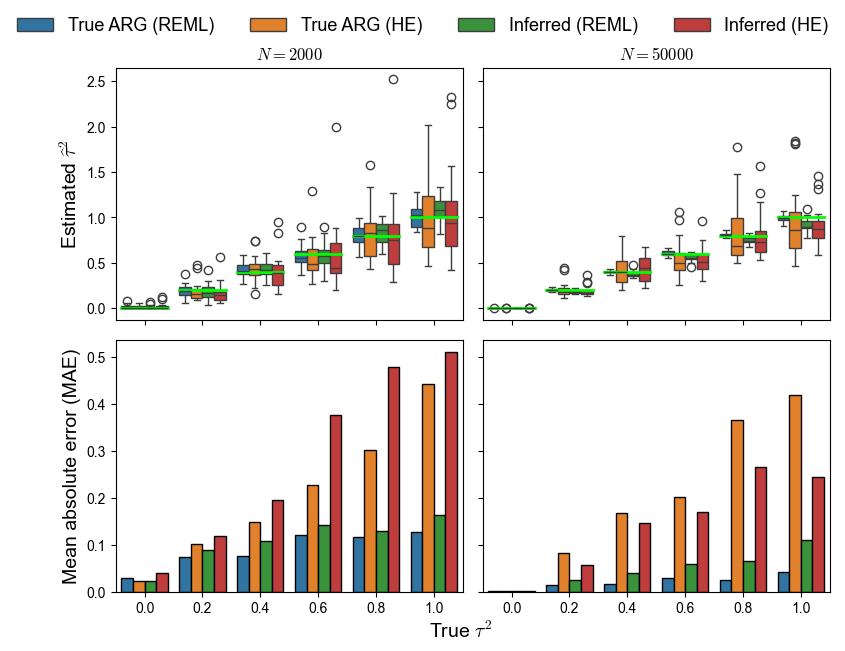

In [3]:
scale = 2
fig, ax = plt.subplots(2, 2, figsize=(4*scale, 3*scale), sharex=True, sharey="row")
xlabels = np.linspace(0, 1, 6)
method_labels = ["True ARG (REML)", "True ARG (HE)", "Inferred (REML)", "Inferred (HE)"] 
sample_sizes = [2000, 5000, 10000, 20000, 50000, 100000]
# plot the box plots
# N = 2000
for i_plot_id, plot_id in enumerate([0,4]):
    to_plot = variance_components[:,:,plot_id,:]
    data_list = []
    for i in range(6):  # Loop through x-axis
        for j in range(4):  # Loop through methods
            for k in range(20):  # Loop through replicates
                data_list.append({
                    'x_value': xlabels[i],  # The x-axis category
                    'Method': method_labels[j],   # The color/group
                    'value': to_plot[i, j, k]      # The data point
                })
    
    df = pd.DataFrame(data_list)
    sns.boxplot(
        data=df,
        x='x_value',  
        y='value',
        hue='Method',
        ax=ax[0,i_plot_id]
    )
    
    for xcoord, ycoord in zip(np.arange(xlabels.size), xlabels):
        margin = 0.4
        ax[0,i_plot_id].plot([xcoord-margin, xcoord+margin], [ycoord, ycoord], ls='solid', lw=2, color='lime')

    # Aesthetics
    handles, labels = ax[0,i_plot_id].get_legend_handles_labels()
    ax[0,i_plot_id].legend().set_visible(False)
    ax[0,i_plot_id].set_xticks(np.arange(6))
    ax[0,i_plot_id].set_xticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax[0,i_plot_id].set_xlabel("", fontsize=14)
    ax[0,i_plot_id].set_title("$N=%d$" % sample_sizes[plot_id])

    if i_plot_id == 0:
        ax[0,i_plot_id].set_ylabel(r"Estimated $\widehat{\tau}^2$", fontsize=14)

fig.legend(handles, labels, bbox_to_anchor=(1.0, 1.05), ncol=4, frameon=False, fontsize=13)


for i_plot_id, plot_id in enumerate([0,4]):
    to_plot = variance_components[:,:,plot_id,:]
    mse = np.sqrt(np.mean(np.square((to_plot - xlabels[:, None, None])), axis=-1))

    data_list = []
    for i in range(6):  # Loop through x-axis
        for j in range(4):  # Loop through methods
            data_list.append({
                'x_value': xlabels[i],  # The x-axis category
                'Method': method_labels[j],   # The color/group
                'value': mse[i, j]      # The data point
            })
    df = pd.DataFrame(data_list)
        
    sns.barplot(
        data=df,
        x='x_value',  
        y='value',
        hue='Method',
        ax=ax[1,i_plot_id],
        edgecolor='black'
    )
    
    # Aesthetics
    handles, labels = ax[0,i_plot_id].get_legend_handles_labels()
    ax[1,i_plot_id].legend().set_visible(False)
    ax[1,i_plot_id].set_xticks(np.arange(6))
    ax[1,i_plot_id].set_xticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax[1,i_plot_id].set_xlabel("", fontsize=14)
    
    if i_plot_id == 0:
        ax[1,i_plot_id].set_ylabel(r"Mean absolute error (MAE)", fontsize=14)

fig.text(0.52, 0, r"True $\tau^2$", fontsize=14, ha="center", va="center")
    
    
plt.tight_layout()
plt.savefig("estimation.pdf", bbox_inches="tight")
plt.show()


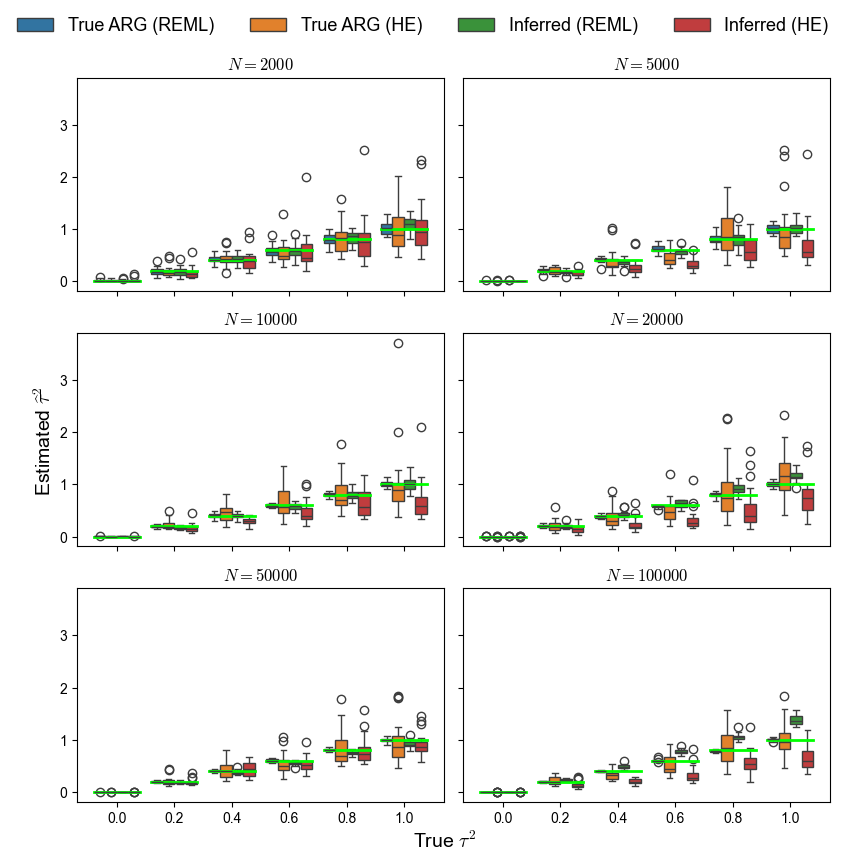

In [4]:
scale = 2
fig, ax = plt.subplots(3, 2, figsize=(4*scale, 4*scale), sharey=True, sharex=True)
xlabels = np.linspace(0, 1, 6)
method_labels = ["True ARG (REML)", "True ARG (HE)", "Inferred (REML)", "Inferred (HE)"] 
sample_sizes = [2000, 5000, 10000, 20000, 50000, 100000]
for plot_id in range(6):
    xidx, yidx = plot_id // 2, plot_id % 2
    to_plot = variance_components[:,:,plot_id,:]

    # main boxplot
    data_list = []
    for i in range(6):  # Loop through x-axis
        for j in range(4):  # Loop through methods
            for k in range(20):  # Loop through replicates
                data_list.append({
                    'x_value': xlabels[i],  # The x-axis category
                    'Method': method_labels[j],   # The color/group
                    'value': to_plot[i, j, k]      # The data point
                })
    df = pd.DataFrame(data_list)
    sns.boxplot(
        data=df,
        x='x_value',  
        y='value',
        hue='Method',
        ax=ax[xidx,yidx]
    )

    # vertical line
    for xcoord, ycoord in zip(np.arange(xlabels.size), xlabels):
        margin = 0.4
        ax[xidx, yidx].plot([xcoord-margin, xcoord+margin], [ycoord, ycoord], ls='solid', lw=2, color='lime')
    
    # Aesthetics
    handles, labels = ax[xidx, yidx].get_legend_handles_labels()
    ax[xidx, yidx].legend().set_visible(False)
    ax[xidx,yidx].set_xticks(np.arange(6))
    ax[xidx,yidx].set_xticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax[xidx,yidx].set_xlabel("", fontsize=14)
    ax[xidx,yidx].set_ylabel("", fontsize=14)

    ax[xidx,yidx].set_title("$N=%d$" % sample_sizes[plot_id])



fig.legend(handles, labels, bbox_to_anchor=(1.0, 1.05), ncol=4, frameon=False, fontsize=13)
fig.text(0, 0.5, r"Estimated $\widehat{\tau}^2$", fontsize=14, rotation=90, ha="center", va="center")
fig.text(0.5, 0, r"True $\tau^2$", fontsize=14, ha="center", va="center")

plt.tight_layout()
plt.savefig("estimation_supp.pdf", bbox_inches="tight")
plt.show()

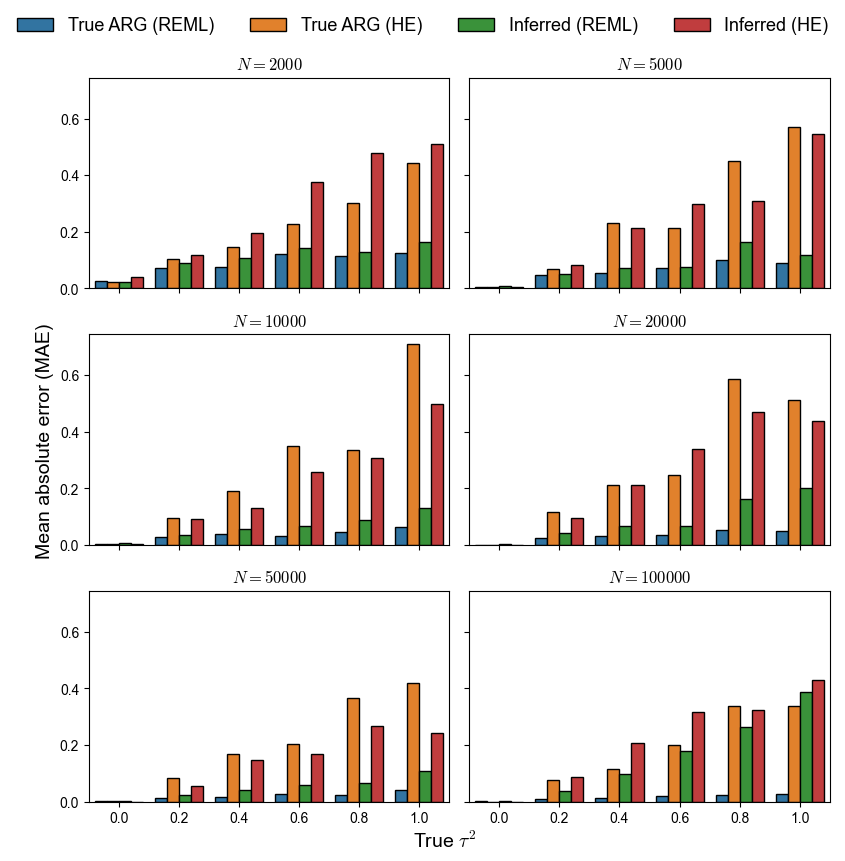

In [5]:
scale = 2
fig, ax = plt.subplots(3, 2, figsize=(4*scale, 4*scale), sharey=True, sharex=True)
xlabels = np.linspace(0, 1, 6)
method_labels = ["True ARG (REML)", "True ARG (HE)", "Inferred (REML)", "Inferred (HE)"] 
sample_sizes = [2000, 5000, 10000, 20000, 50000, 100000]
for plot_id in range(6):
    xidx, yidx = plot_id // 2, plot_id % 2
    to_plot = variance_components[:,:,plot_id,:]
    mse = np.sqrt(np.mean(np.square((to_plot - xlabels[:, None, None])), axis=-1))

    data_list = []
    for i in range(6):  # Loop through x-axis
        for j in range(4):  # Loop through methods
            data_list.append({
                'x_value': xlabels[i],  # The x-axis category
                'Method': method_labels[j],   # The color/group
                'value': mse[i, j]      # The data point
            })
    df = pd.DataFrame(data_list)
        
    sns.barplot(
        data=df,
        x='x_value',  
        y='value',
        hue='Method',
        ax=ax[xidx,yidx],
        edgecolor='black'
    )
    
    # Aesthetics
    handles, labels = ax[xidx, yidx].get_legend_handles_labels()
    ax[xidx, yidx].legend().set_visible(False)
    ax[xidx,yidx].set_xticks(np.arange(6))
    ax[xidx,yidx].set_xticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax[xidx,yidx].set_xlabel("", fontsize=14)
    ax[xidx,yidx].set_ylabel("", fontsize=14)
    ax[xidx,yidx].set_title("$N=%d$" % sample_sizes[plot_id])



fig.legend(handles, labels, bbox_to_anchor=(1.0, 1.05), ncol=4, frameon=False, fontsize=13)
fig.text(0, 0.5, "Mean absolute error (MAE)", fontsize=14, rotation=90, ha="center", va="center")
fig.text(0.5, 0, r"True $\tau^2$", fontsize=14, ha="center", va="center")

plt.tight_layout()
plt.savefig("mae_supp.pdf", bbox_inches="tight")
plt.show()